In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns


In [3]:
feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
feature_name_df

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [6]:
feature_name_df.iloc[:, 1].values.tolist()

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [11]:
feature_dup_df = feature_name_df.groupby('column_name').count()
feature_dup_df[feature_dup_df['column_index']>1]

,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3
"fBodyAcc-bandsEnergy()-25,32",3
"fBodyAcc-bandsEnergy()-25,48",3
"fBodyAcc-bandsEnergy()-33,40",3
"fBodyAcc-bandsEnergy()-33,48",3


In [14]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
        columns=['dup_cnt'])
    feature_dup_df.reset_index(inplace=True)
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0] + '_' + str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [15]:
df = get_new_feature_name_df(feature_name_df)
df[df['dup_cnt']>0]

,column_index,column_name,dup_cnt
316,317,"fBodyAcc-bandsEnergy()-1,8_1",1
317,318,"fBodyAcc-bandsEnergy()-9,16_1",1
318,319,"fBodyAcc-bandsEnergy()-17,24_1",1
319,320,"fBodyAcc-bandsEnergy()-25,32_1",1
320,321,"fBodyAcc-bandsEnergy()-33,40_1",1
...,...,...,...
497,498,"fBodyGyro-bandsEnergy()-17,32_2",2
498,499,"fBodyGyro-bandsEnergy()-33,48_2",2
499,500,"fBodyGyro-bandsEnergy()-49,64_2",2
500,501,"fBodyGyro-bandsEnergy()-1,24_2",2


In [17]:
def get_human_dataset():
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', names=feature_name)

    Y_train = pd.read_csv('./human_activity/train/Y_train.txt', sep='\s+', header=None, names=['action'])
    Y_test = pd.read_csv('./human_activity/test/Y_test.txt', sep='\s+', header=None, names=['action'])
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = get_human_dataset()

In [22]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, Y_train)
pred = dt_clf.predict(X_test)
accuracy_score(Y_test, pred)

0.8547675602307431

In [32]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 156,
 'splitter': 'best'}

In [31]:
param = {
    'max_depth': [6, 8, 10, 12, 16, 20, 24],
    'min_samples_split': [16]
}
grid_cv = GridSearchCV(dt_clf, param_grid=param, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24],
                         'min_samples_split': [16]},
             scoring='accuracy', verbose=1)

In [33]:
grid_cv.best_score_

0.8548794147162603

In [34]:
pd.DataFrame(grid_cv.cv_results_)[['rank_test_score', 'mean_test_score', 'params']]

,rank_test_score,mean_test_score,params
0,5,0.847662,"{'max_depth': 6, 'min_samples_split': 16}"
1,1,0.854879,"{'max_depth': 8, 'min_samples_split': 16}"
2,2,0.852705,"{'max_depth': 10, 'min_samples_split': 16}"
3,7,0.845768,"{'max_depth': 12, 'min_samples_split': 16}"
4,6,0.847127,"{'max_depth': 16, 'min_samples_split': 16}"
5,3,0.848624,"{'max_depth': 20, 'min_samples_split': 16}"
6,3,0.848624,"{'max_depth': 24, 'min_samples_split': 16}"


In [37]:
max_depth = [6, 8, 10, 12, 16, 20, 24]
for d in max_depth:
    dt_clf = DecisionTreeClassifier(max_depth=d, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train, Y_train)
    pred = dt_clf.predict(X_test)
    print(d, accuracy_score(Y_test, pred))

6 0.8551068883610451
8 0.8717339667458432
10 0.8598574821852731
12 0.8571428571428571
16 0.8598574821852731
20 0.8564642008822532
24 0.8564642008822532


In [39]:
param = {
    'max_depth': [8, 12, 16, 20],
    'min_samples_split': [16, 24]
}
grid_cv = GridSearchCV(dt_clf, param_grid=param, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, Y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.8548794147162603
{'max_depth': 8, 'min_samples_split': 16}


In [40]:
param = {
    'max_depth': [8],
    'min_samples_split': [4, 6, 8, 10, 12, 16, 18, 24]
}
grid_cv = GridSearchCV(dt_clf, param_grid=param, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, Y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.8548794147162603
{'max_depth': 8, 'min_samples_split': 16}


In [42]:
pred = grid_cv.best_estimator_.predict(X_test)
print(accuracy_score(Y_test, pred))

0.8717339667458432


In [48]:
i_v = grid_cv.best_estimator_.feature_importances_
top20 = pd.Series(i_v, index=X_train.columns).sort_values(ascending=False)[:10]


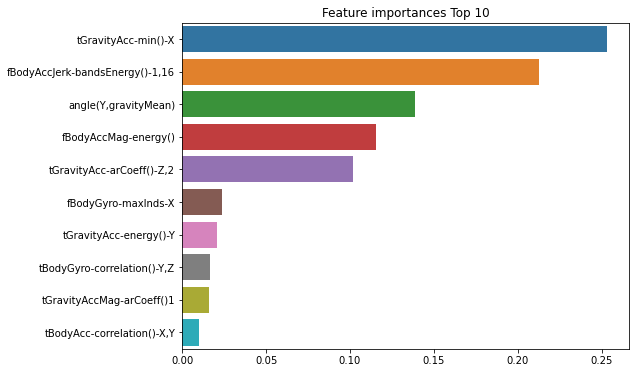

In [50]:
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 10')
sns.barplot(x=top20, y=top20.index)
plt.show()